## Modelling 

This note looks at fitting various models to the datasets.  

I am going fit the following classifiers on each of the dataseets (with PCA and without PCA):

* Logistic Regression
* Random Forest
* Support Vector Machine (classifier)
* K-Nearest Neighbours
* Naive Bayes
* Decision Tree

In [19]:
import pandas as pd

X_train_transformed = pd.read_csv('../../data/X_train_transformed.csv')
X_test_transformed = pd.read_csv('../../data/X_test_transformed.csv')
X_val_transformed = pd.read_csv('../../data/X_val_transformed.csv')
X_train_pca = pd.read_csv('../../data/X_train_pca.csv')
X_test_pca = pd.read_csv('../../data/X_test_pca.csv')
X_val_pca = pd.read_csv('../../data/X_val_pca.csv')


y_train = pd.read_csv('../../data/y_train.csv')
y_test = pd.read_csv('../../data/y_test.csv')
y_val = pd.read_csv('../../data/y_val.csv')

In [20]:
print(len(X_train_transformed))
print(len(X_test_transformed))
print(len(X_train_pca))
print(len(X_test_pca))
print(len(y_train))
print(len(y_test))

18861
6288
18861
6288
18861
6288


Having reconsidered the situation, I am now going to split the training datasets to get a validation set and leave the test sets for final model evaluation. I would probably want to split into three datasets from the start next time - I went back and updated the previous code.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# models
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB()
]

# iterate over the datasets
for dataset_name, X_train, X_val in [('X_train_transformed', X_train_transformed, X_val_transformed),
                                    ('X_train_pca', X_train_pca, X_val_pca)]:
    print(f"Results for {dataset_name}:")
    
    # iterate over the models
    for model in models:
        model_name = type(model).__name__
        print(f"Model: {model_name}")
        
        # fit model on the training data
        model.fit(X_train, y_train.values.ravel())  
        
        # predictions on the validation set
        y_pred_val = model.predict(X_val)
        
        # evaluation metrics on the validation set
        accuracy_val = accuracy_score(y_val, y_pred_val)
        precision_val = precision_score(y_val, y_pred_val, average='weighted', zero_division=0)
        recall_val = recall_score(y_val, y_pred_val, average='weighted', zero_division=0)
        f1_val = f1_score(y_val, y_pred_val, average='weighted', zero_division=0)
        
        print(f"Validation Accuracy: {accuracy_val}")
        print(f"Validation Precision: {precision_val}")
        print(f"Validation Recall: {recall_val}")
        print(f"Validation F1 Score: {f1_val}")
        
        # confusion matrix for the validation set
        confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
        print("Confusion Matrix (Validation Set):")
        print(confusion_matrix_val)
        
        print()



Results for X_train_transformed:
Model: LogisticRegression
Validation Accuracy: 0.7014949109414759
Validation Precision: 0.6789715814695912
Validation Recall: 0.7014949109414759
Validation F1 Score: 0.6773384147821265
Confusion Matrix (Validation Set):
[[ 213    3  347    2]
 [   0  430  344  607]
 [ 116   95 2144   11]
 [   2  299   51 1624]]

Model: DecisionTreeClassifier
Validation Accuracy: 0.6372455470737913
Validation Precision: 0.6348486963403792
Validation Recall: 0.6372455470737913
Validation F1 Score: 0.6359989029436383
Confusion Matrix (Validation Set):
[[ 246   15  299    5]
 [   8  560  283  530]
 [ 309  251 1771   35]
 [   4  504   38 1430]]

Model: RandomForestClassifier
Validation Accuracy: 0.709764631043257
Validation Precision: 0.6916675731434337
Validation Recall: 0.709764631043257
Validation F1 Score: 0.6936903848920055
Confusion Matrix (Validation Set):
[[ 241    2  321    1]
 [   0  522  312  547]
 [ 161   80 2112   13]
 [   3  352   33 1588]]

Model: SVC
Validati

In [37]:
import pandas as pd
import numpy as np

# empty list of dictionaries for metrics data
metrics_data = [
    {
        'Model': '',
        'Dataset': '',
        'Val Accuracy': np.nan,
        'Val Precision': np.nan,
        'Val Recall': np.nan,
        'Val F1 Score': np.nan
    }
]
confusion_matrices = {}

# iterate over the datasets
for dataset_name, X_train, X_val in [('X_train_transformed', X_train_transformed, X_val_transformed),
                                    ('X_train_pca', X_train_pca, X_val_pca)]:
    print(f"\nDataset {dataset_name}:\n")
    
    # iterate over the models
    for model in models:
        model_name = type(model).__name__
        print(f"Saving results for: {model_name}")
        
        # fit model on the training data
        model.fit(X_train, y_train.values.ravel())  
        
        # predictions on the validation set
        y_pred_val = model.predict(X_val)
        
        # evaluation metrics on the validation set
        accuracy_val = accuracy_score(y_val, y_pred_val)
        precision_val = precision_score(y_val, y_pred_val, average='weighted', zero_division=0)
        recall_val = recall_score(y_val, y_pred_val, average='weighted', zero_division=0)
        f1_val = f1_score(y_val, y_pred_val, average='weighted', zero_division=0)
        
        # store metrics 
        metrics_data.append({
            'Model': model_name,
            'Dataset': dataset_name,
            'Val Accuracy': accuracy_val,
            'Val Precision': precision_val,
            'Val Recall': recall_val,
            'Val F1 Score': f1_val
        })
        
        # confusion matrix for the validation set
        confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
        
        # store confusion matrix using dataset and model as keys
        confusion_matrices[(dataset_name, model_name)] = confusion_matrix_val

# metrics df
metrics_df = pd.DataFrame(metrics_data)



Dataset X_train_transformed:

Saving results for: LogisticRegression
Saving results for: DecisionTreeClassifier
Saving results for: RandomForestClassifier
Saving results for: SVC
Saving results for: KNeighborsClassifier
Saving results for: GaussianNB

Dataset X_train_pca:

Saving results for: LogisticRegression
Saving results for: DecisionTreeClassifier
Saving results for: RandomForestClassifier
Saving results for: SVC
Saving results for: KNeighborsClassifier
Saving results for: GaussianNB


In [38]:

# Print
print("Metrics DataFrame:")
print(metrics_df)



Metrics DataFrame:
                     Model              Dataset  Val Accuracy  Val Precision  \
0                                                         NaN            NaN   
1       LogisticRegression  X_train_transformed      0.701495       0.678972   
2   DecisionTreeClassifier  X_train_transformed      0.637882       0.635127   
3   RandomForestClassifier  X_train_transformed      0.710560       0.692420   
4                      SVC  X_train_transformed      0.705630       0.688544   
5     KNeighborsClassifier  X_train_transformed      0.675254       0.658478   
6               GaussianNB  X_train_transformed      0.642335       0.610419   
7       LogisticRegression          X_train_pca      0.672551       0.632634   
8   DecisionTreeClassifier          X_train_pca      0.616412       0.612023   
9   RandomForestClassifier          X_train_pca      0.676368       0.651364   
10                     SVC          X_train_pca      0.684796       0.603318   
11    KNeighborsClass

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# filter out the empty row if it exists
if metrics_df.iloc[0].isnull().all():
    metrics_df = metrics_df.iloc[1:]

# figure size
plt.figure(figsize=(12, 8))

# style 
sns.set(style="whitegrid")

# palette 
dataset_palette = {'X_train_transformed': 'blue', 'X_train_pca': 'orange'}

# iterate over the metrics
metrics = ['Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1 Score']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Model', y=metric, hue='Dataset', data=metrics_df, palette=dataset_palette)
    plt.title(metric)
    plt.xlabel('')
    plt.ylabel('')

# tight
plt.tight_layout()

# plot
plt.show()



ValueError: min() arg is an empty sequence

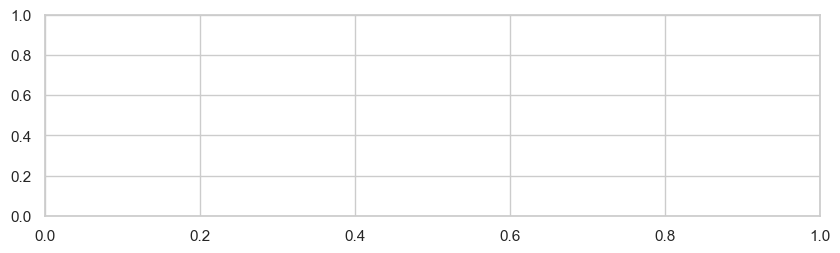

In [51]:

import seaborn as sns
import matplotlib.pyplot as plt

# filter out the empty row if it exists
if metrics_df.iloc[0].isnull().all():
    metrics_df = metrics_df.iloc[1:]

# figure size
plt.figure(figsize=(10, 12))

# Sstyle
sns.set(style="whitegrid")

# palette 
dataset_palette = {'X_train_transformed': 'blue', 'X_train_pca': 'orange'}

# legend for all plots
legend_handles = []
for dataset, color in dataset_palette.items():
    legend_handles.append(plt.Line2D([], [], color=color, label=dataset))

# iterate over the metrics
metrics = ['Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1 Score']

for i, metric in enumerate(metrics):
    ax = plt.subplot(4, 1, i+1)
    sns.barplot(x=metric, y='Model', hue='Dataset', data=metrics_df, palette=dataset_palette, orient='h')
    plt.title(metric)
    plt.xlabel(metric)
    plt.ylabel('')
    plt.legend(handles=legend_handles, loc='upper right')
    
    # y-axis limits for better visibility
    ax.set_xlim(0, 1)  

# tight
plt.tight_layout()

# plot
plt.show()






In [ ]:

# access confusion matrix for a specific dataset and model
dataset_name = 'X_train_transformed'
model_name = 'LogisticRegression'
confusion_matrix_val = confusion_matrices[(dataset_name, model_name)]
print(f"Confusion Matrix for {dataset_name} - {model_name}:")
print(confusion_matrix_val)


